In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import category_encoders as ce
import os
import pickle
import gc
from tqdm import tqdm
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import ensemble
import xgboost as xgb
from numpy import loadtxt
from keras.utils.vis_utils import plot_model
import pydot

Using TensorFlow backend.


In [2]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [4]:
def encode_text_features(encode_decode, data_frame, encoder_isa=None, encoder_mem_type=None):
    # Implement Categorical OneHot encoding for ISA and mem-type
    if encode_decode == 'encode':
        encoder_isa = ce.one_hot.OneHotEncoder(cols=['isa'])
        encoder_mem_type = ce.one_hot.OneHotEncoder(cols=['mem-type'])
        encoder_isa.fit(data_frame, verbose=1)
        df_new1 = encoder_isa.transform(data_frame)
        encoder_mem_type.fit(df_new1, verbose=1)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
    else:
        df_new1 = encoder_isa.transform(data_frame)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
        
    return encoded_data_frame, encoder_isa, encoder_mem_type

In [51]:
all_datasets = 'C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Paper_2_Aditya\\Dataset\\'
dfn = pd.read_csv('C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Paper_2_Aditya\\Transfer Learning\\Intel-To-ARM\\ARM.csv')
df = pd.read_csv( 'C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Paper_2_Aditya\\Transfer Learning\\Intel-To-ARM\\INTEL.csv')

In [52]:
df.head()

,arch,cpu-clock,isa,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,l2_shared_by_threads,...,l3_cache_lines,l3_shared_by_threads,l3_size,mem-size,mem-type,mem_clock,num-cpus,PS,runtime,power
0,IntelCorei36100U_DDR41866_2GB,2.3,X86_64,8,64,1,32,4,64,1,...,64,2,3,2,DDR4,1866,2,1000,584,5.56428
1,IntelCorei36100U_DDR41866_2GB,2.3,X86_64,8,64,1,32,4,64,1,...,64,2,3,2,DDR4,1866,2,2000,1230,5.70416
2,IntelCorei36100U_DDR41866_2GB,2.3,X86_64,8,64,1,32,4,64,1,...,64,2,3,2,DDR4,1866,2,3000,1929,5.63798
3,IntelCorei36100U_DDR41866_2GB,2.3,X86_64,8,64,1,32,4,64,1,...,64,2,3,2,DDR4,1866,2,4000,2653,5.61658
4,IntelCorei36100U_DDR41866_2GB,2.3,X86_64,8,64,1,32,4,64,1,...,64,2,3,2,DDR4,1866,2,5000,3409,5.58136


In [53]:
dfn.head()

,arch,cpu-clock,isa,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,l2_shared_by_threads,...,l3_cache_lines,l3_shared_by_threads,l3_size,mem-size,mem-type,mem_clock,num-cpus,PS,runtime,power
0,ARM_AMDOpteronA57_A1120_DDR41866_2GB,1.7,ARM,8,64,1,32,8,64,1,...,64,4,8,2,DDR4,1866,4,1000,562,0.575793
1,ARM_AMDOpteronA57_A1120_DDR41866_2GB,1.7,ARM,8,64,1,32,8,64,1,...,64,4,8,2,DDR4,1866,4,2000,1122,0.609248
2,ARM_AMDOpteronA57_A1120_DDR41866_2GB,1.7,ARM,8,64,1,32,8,64,1,...,64,4,8,2,DDR4,1866,4,3000,1697,0.620265
3,ARM_AMDOpteronA57_A1120_DDR41866_2GB,1.7,ARM,8,64,1,32,8,64,1,...,64,4,8,2,DDR4,1866,4,4000,2287,0.623432
4,ARM_AMDOpteronA57_A1120_DDR41866_2GB,1.7,ARM,8,64,1,32,8,64,1,...,64,4,8,2,DDR4,1866,4,5000,2884,0.628268


In [54]:
df.columns, len(df.columns), dfn.columns, len(dfn.columns) # bus-speed is extra in physical

(Index(['arch', 'cpu-clock', 'isa', 'l1d_assoc', 'l1d_cache_lines',
        'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
        'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
        'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type', 'mem_clock',
        'num-cpus', 'PS', 'runtime', 'power'],
       dtype='object'),
 22,
 Index(['arch', 'cpu-clock', 'isa', 'l1d_assoc', 'l1d_cache_lines',
        'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
        'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
        'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type', 'mem_clock',
        'num-cpus', 'PS', 'runtime', 'power'],
       dtype='object'),
 22)

In [55]:
len(df),len(dfn)

(1440, 720)

In [56]:
encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, encoder_isa = None, encoder_mem_type=None)

In [57]:
encoded_data_frame_n, encoder_isa_n, encoder_mem_type_n = encode_text_features('encode', dfn, encoder_isa = None, encoder_mem_type=None)

In [58]:
encoded_data_frame.head()

,arch,cpu-clock,isa_1,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,l2_shared_by_threads,...,l3_size,mem-size,mem-type_1,mem-type_2,mem-type_3,mem_clock,num-cpus,PS,runtime,power
0,IntelCorei36100U_DDR41866_2GB,2.3,1,8,64,1,32,4,64,1,...,3,2,1,0,0,1866,2,1000,584,5.56428
1,IntelCorei36100U_DDR41866_2GB,2.3,1,8,64,1,32,4,64,1,...,3,2,1,0,0,1866,2,2000,1230,5.70416
2,IntelCorei36100U_DDR41866_2GB,2.3,1,8,64,1,32,4,64,1,...,3,2,1,0,0,1866,2,3000,1929,5.63798
3,IntelCorei36100U_DDR41866_2GB,2.3,1,8,64,1,32,4,64,1,...,3,2,1,0,0,1866,2,4000,2653,5.61658
4,IntelCorei36100U_DDR41866_2GB,2.3,1,8,64,1,32,4,64,1,...,3,2,1,0,0,1866,2,5000,3409,5.58136


In [59]:
encoded_data_frame_n.head()

,arch,cpu-clock,isa_1,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,l2_shared_by_threads,...,l3_size,mem-size,mem-type_1,mem-type_2,mem-type_3,mem_clock,num-cpus,PS,runtime,power
0,ARM_AMDOpteronA57_A1120_DDR41866_2GB,1.7,1,8,64,1,32,8,64,1,...,8,2,1,0,0,1866,4,1000,562,0.575793
1,ARM_AMDOpteronA57_A1120_DDR41866_2GB,1.7,1,8,64,1,32,8,64,1,...,8,2,1,0,0,1866,4,2000,1122,0.609248
2,ARM_AMDOpteronA57_A1120_DDR41866_2GB,1.7,1,8,64,1,32,8,64,1,...,8,2,1,0,0,1866,4,3000,1697,0.620265
3,ARM_AMDOpteronA57_A1120_DDR41866_2GB,1.7,1,8,64,1,32,8,64,1,...,8,2,1,0,0,1866,4,4000,2287,0.623432
4,ARM_AMDOpteronA57_A1120_DDR41866_2GB,1.7,1,8,64,1,32,8,64,1,...,8,2,1,0,0,1866,4,5000,2884,0.628268


In [60]:
encoded_data_frame.columns

Index(['arch', 'cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
       'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
       'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
       'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type_1',
       'mem-type_2', 'mem-type_3', 'mem_clock', 'num-cpus', 'PS', 'runtime',
       'power'],
      dtype='object')

In [61]:
encoded_data_frame_n.columns

Index(['arch', 'cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
       'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
       'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
       'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type_1',
       'mem-type_2', 'mem-type_3', 'mem_clock', 'num-cpus', 'PS', 'runtime',
       'power'],
      dtype='object')

In [62]:
total_data_n = encoded_data_frame_n.drop(columns = ['arch'])

In [63]:
total_data = encoded_data_frame.drop(columns = ['arch'])

In [64]:
total_data.columns, total_data_n.columns

(Index(['cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
        'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
        'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
        'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type_1',
        'mem-type_2', 'mem-type_3', 'mem_clock', 'num-cpus', 'PS', 'runtime',
        'power'],
       dtype='object'),
 Index(['cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
        'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
        'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
        'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type_1',
        'mem-type_2', 'mem-type_3', 'mem_clock', 'num-cpus', 'PS', 'runtime',
        'power'],
       dtype='object'))

In [65]:
total_data = total_data.fillna(0)
total_data_n = total_data_n.fillna(0)

In [66]:
X_Intel = total_data.drop(columns = ['runtime','power']).to_numpy()
Y_Intel = total_data[['runtime','power']].to_numpy()

In [67]:
X_ARM = total_data_n.drop(columns = ['runtime','power']).to_numpy()
Y_ARM = total_data_n[['runtime','power']].to_numpy()

In [68]:
X_Intel.shape, X_ARM.shape, Y_Intel.shape, Y_ARM.shape

((1440, 21), (720, 21), (1440, 2), (720, 2))

In [69]:
Y_Intel[:10], Y_ARM[:10] 

(array([[ 584.     ,    5.56428],
        [1230.     ,    5.70416],
        [1929.     ,    5.63798],
        [2653.     ,    5.61658],
        [3409.     ,    5.58136],
        [3902.     ,    5.51593],
        [ 584.     ,    5.56428],
        [1230.     ,    5.70416],
        [1929.     ,    5.63798],
        [2653.     ,    5.61658]]), array([[5.62000e+02, 5.75793e-01],
        [1.12200e+03, 6.09248e-01],
        [1.69700e+03, 6.20265e-01],
        [2.28700e+03, 6.23432e-01],
        [2.88400e+03, 6.28268e-01],
        [3.32700e+03, 6.07913e-01],
        [5.62000e+02, 5.75793e-01],
        [1.12200e+03, 6.09248e-01],
        [1.69700e+03, 6.20265e-01],
        [2.28700e+03, 6.23432e-01]]))

In [70]:
# Separating ARM data to 1% and 99%
X_train_ARM, X_test_ARM, Y_train_ARM, Y_test_ARM = train_test_split(X_ARM, Y_ARM, test_size = 0.99, random_state=42)
print(X_train_ARM.shape, X_test_ARM.shape, Y_train_ARM.shape, Y_test_ARM.shape)
X_train_Intel = np.append(X_Intel, X_train_ARM,axis = 0)
Y_train_Intel = np.append(Y_Intel, Y_train_ARM,axis = 0)
print(X_train_Intel.shape, Y_train_Intel.shape, X_test_ARM.shape, Y_test_ARM.shape)

(7, 21) (713, 21) (7, 2) (713, 2)
(1447, 21) (1447, 2) (713, 21) (713, 2)


In [71]:
scaler_x = StandardScaler()
X_Intel = scaler_x.fit_transform(X_Intel)
X_train_ARM = scaler_x.fit_transform(X_train_ARM)
X_test_ARM = scaler_x.fit_transform(X_test_ARM)
scaler_y = StandardScaler()
# Y_Intel = np.reshape(Y_Intel, (len(Y_Intel),1))
# Y_test_ARM = np.reshape(Y_test_ARM, (len(Y_test_ARM),1))
# Y_train_ARM = np.reshape(Y_train_ARM, (len(Y_train_ARM),1))
Y_Intel = scaler_y.fit_transform(Y_Intel)
Y_test_ARM = scaler_y.fit_transform(Y_test_ARM)
Y_train_ARM = scaler_y.fit_transform(Y_train_ARM)
print(X_Intel.shape, Y_Intel.shape, X_train_ARM.shape, Y_train_ARM.shape, X_test_ARM.shape, Y_test_ARM.shape)

(1440, 21) (1440, 2) (7, 21) (7, 2) (713, 21) (713, 2)


In [72]:
def absolute_percentage_error(Y_test, Y_pred):
    error = 0
    for i in range(len(Y_test)):
        if(Y_test[i]!= 0 ):
            error = error + (abs(Y_test[i] - Y_pred[i]))/Y_test[i]
        
    error = error/ len(Y_test)
    return error

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                1408      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 130       
Total params: 9,858
Trainable params: 9,858
Non-trainable params: 0
_________________________________________________________________
Model : DNN 2 None


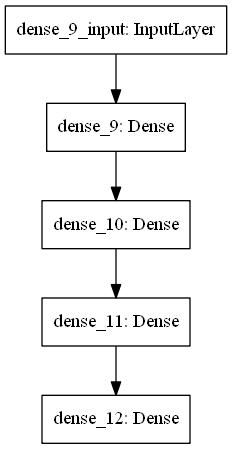

In [73]:
dnn_2 = Sequential()
dnn_2.add(Dense(64, input_dim = 21, activation='relu'))
# dnn_2.add(Dropout(0.4))
dnn_2.add(Dense(64, activation='relu'))
# dnn_2.add(Dropout(0.4))
dnn_2.add(Dense(64, activation='relu'))
# dnn_2.add(Dropout(0.4))
dnn_2.add(Dense(2, activation='linear'))
print('Model : DNN 2', dnn_2.summary())
plot_model(dnn_2)

In [74]:
dnn_2.compile(loss='mae', optimizer='adam', metrics=['mae'])
dnn_2.fit(X_Intel, Y_Intel, epochs = 100, batch_size = 10, verbose = 2)

Epoch 1/100
 - 0s - loss: 0.3081 - mae: 0.3081
Epoch 2/100
 - 0s - loss: 0.0874 - mae: 0.0874
Epoch 3/100
 - 0s - loss: 0.0652 - mae: 0.0652
Epoch 4/100
 - 0s - loss: 0.0558 - mae: 0.0558
Epoch 5/100
 - 0s - loss: 0.0497 - mae: 0.0497
Epoch 6/100
 - 0s - loss: 0.0464 - mae: 0.0464
Epoch 7/100
 - 0s - loss: 0.0461 - mae: 0.0461
Epoch 8/100
 - 0s - loss: 0.0460 - mae: 0.0460
Epoch 9/100
 - 0s - loss: 0.0415 - mae: 0.0415
Epoch 10/100
 - 0s - loss: 0.0397 - mae: 0.0397
Epoch 11/100
 - 0s - loss: 0.0385 - mae: 0.0385
Epoch 12/100
 - 0s - loss: 0.0360 - mae: 0.0360
Epoch 13/100
 - 0s - loss: 0.0396 - mae: 0.0396
Epoch 14/100
 - 0s - loss: 0.0366 - mae: 0.0366
Epoch 15/100
 - 0s - loss: 0.0318 - mae: 0.0318
Epoch 16/100
 - 0s - loss: 0.0313 - mae: 0.0313
Epoch 17/100
 - 0s - loss: 0.0342 - mae: 0.0342
Epoch 18/100
 - 0s - loss: 0.0310 - mae: 0.0310
Epoch 19/100
 - 0s - loss: 0.0329 - mae: 0.0329
Epoch 20/100
 - 0s - loss: 0.0293 - mae: 0.0293
Epoch 21/100
 - 0s - loss: 0.0320 - mae: 0.0320
E

In [75]:
# Freeze the layers except the last 2 dense layers
for layer in dnn_2.layers[:-2]:
    layer.trainable = False
    print(layer)

# Check the trainable status of the individual layers
for layer in dnn_2.layers:
    print(layer, layer.trainable)

<keras.layers.core.Dense object at 0x0000004F7D13F9B0> False
<keras.layers.core.Dense object at 0x0000004F7D13FF28> False
<keras.layers.core.Dense object at 0x0000004F7D2A0278> True
<keras.layers.core.Dense object at 0x0000004F7D2635F8> True


In [76]:
dnn_2.fit(X_train_ARM, Y_train_ARM, epochs = 100, batch_size = 1, verbose = 2)

C:\Users\Rajat\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1/100
 - 0s - loss: 0.3189 - mae: 0.3189
Epoch 2/100
 - 0s - loss: 0.1609 - mae: 0.1609
Epoch 3/100
 - 0s - loss: 0.1207 - mae: 0.1207
Epoch 4/100
 - 0s - loss: 0.1142 - mae: 0.1142
Epoch 5/100
 - 0s - loss: 0.0999 - mae: 0.0999
Epoch 6/100
 - 0s - loss: 0.1673 - mae: 0.1673
Epoch 7/100
 - 0s - loss: 0.1410 - mae: 0.1410
Epoch 8/100
 - 0s - loss: 0.1148 - mae: 0.1148
Epoch 9/100
 - 0s - loss: 0.0714 - mae: 0.0714
Epoch 10/100
 - 0s - loss: 0.0740 - mae: 0.0740
Epoch 11/100
 - 0s - loss: 0.0958 - mae: 0.0958
Epoch 12/100
 - 0s - loss: 0.1316 - mae: 0.1316
Epoch 13/100
 - 0s - loss: 0.0769 - mae: 0.0769
Epoch 14/100
 - 0s - loss: 0.0918 - mae: 0.0918
Epoch 15/100
 - 0s - loss: 0.1453 - mae: 0.1453
Epoch 16/100
 - 0s - loss: 0.1307 - mae: 0.1307
Epoch 17/100
 - 0s - loss: 0.0770 - mae: 0.0770
Epoch 18/100
 - 0s - loss: 0.0922 - mae: 0.0922
Epoch 19/100
 - 0s - loss: 0.1002 - mae: 0.1002
Epoch 20/100
 - 0s - loss: 0.0458 - mae: 0.0458
Epoch 21/100
 - 0s - loss: 0.1091 - mae: 0.1091
E

In [81]:
Y_pred = dnn_2.predict(X_test_ARM)

In [84]:
pickle.dump(dnn_2, open('dnn_model_intel_to_ARM', 'wb'))

MSE: 
 41286.66924857314

R2: 
 0.8296179346889205

MAPE Runtime: 
 0.12475475779043518

MAPE Power: 
 0.08327985866351675


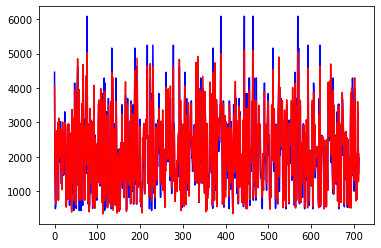

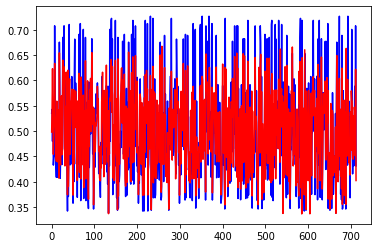

In [83]:
Y_fold = scaler_y.inverse_transform(Y_test_ARM)
Y_pred = scaler_y.inverse_transform(Y_pred)
plt.figure()
plt.plot(Y_fold[:,0], 'b')
plt.plot(Y_pred[:,0], 'r')
plt.figure()
plt.plot(Y_fold[:,1], 'b')
plt.plot(Y_pred[:,1], 'r')
r2_scores = (r2_score(Y_fold, Y_pred))
mse_scores = (mean_squared_error(Y_fold, Y_pred))
mape_scores_runtime = (absolute_percentage_error(Y_fold[:,0], Y_pred[:,0]))
mape_scores_power = (absolute_percentage_error(Y_fold[:,1], Y_pred[:,1]))
print('MSE: \n', mse_scores)
print('\nR2: \n', r2_scores)
print('\nMAPE Runtime: \n', mape_scores_runtime)
print('\nMAPE Power: \n', mape_scores_power)